In [28]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [116]:
def standardize_cols(X):
    zscore = lambda x: (x.mean() - x)/x.std()
    return pd.DataFrame(X).apply(zscore).values

def binarize_cols(X):
    temp = X.copy()
    temp[temp > 0] = 1
    temp[temp <= 0] = 0
    return temp

In [34]:
spam_data = scipy.io.loadmat("data/spam.mat")
Xraw = pd.DataFrame(spam_data['Xtrain'])
y = spam_data['Ytrain'].reshape((3450,))
Xtestraw = pd.DataFrame(spam_data['Xtest'])
print(Xraw.shape, y.shape, Xtestraw.shape)

stan_X = pd.DataFrame(standardize_cols(Xraw.values))
log_X = pd.DataFrame(np.log(Xraw.values + 0.1))
bin_X = pd.DataFrame(binarize_cols(Xraw.values))
stan_X[57] = 1
log_X[57] = 1
bin_X[57] = 1
Xraw[57] = 1
X = Xraw.values
stan_X = stan_X.values
log_X = log_X.values
bin_X = bin_X.values
print(X.shape, stan_X.shape, log_X.shape, bin_X.shape)

(3450, 57) (3450,) (1151, 57)
(3450, 58) (3450, 58) (3450, 58) (3450, 58)


In [268]:
from random import shuffle

def kernel_stochastic_gradient_descent(xi, yi, alphai, X, y, alphas, gamma, lr):
    quad_kern = lambda xi, X: (np.dot(X, xi) + 1) ** 2
    fx = lambda ai, xi, X: np.sum(ai * quad_kern(xi, X))
    z = np.dot(yi, fx(alphai, xi, X))
    top = 1
    bottom = 1 + np.exp(-z)
    combo = (top / bottom)
#    print(type(np.log(1 + np.exp(-z))))
    risk = np.log(1 + np.exp(-z))
    dw = gamma * alphai + lr * (combo * yi)
    return dw, risk

def kernel_stochastic_auto_alpha_wrapper(X, y, num_iters):
    shuff = list(range(len(X)))
    shuffle(shuff)
    alphas = np.random.randn(len(X)) / 1000000
    X = X[shuff]
    y = y[shuff]
    risks = []
    gamma = 10e-5
    for count in range(num_iters):
        lr = 1/(count + 1)
        sub_risks = []
        for count1, (xi, yi, alphai) in enumerate(zip(X, y, alphas)):
            dalphai, risk = kernel_stochastic_gradient_descent(xi, yi, alphai, X, y, alphas, gamma, lr)
            alphas[count1] = alphai - dalphai
            alphas[:count1] = alphas[:count1] - gamma * alphas[:count1]
            alphas[count1+1:] = alphas[count1+1:] - gamma * alphas[count1+1:]
            sub_risks.append(risk)
            print(risk)
        risks.append(np.sum(sub_risks))
    return alphas, pd.DataFrame(risks)

In [269]:
w2, risks2 = kernel_stochastic_auto_alpha_wrapper(X, y, 1)

inf
inf
0.0
inf
inf
0.0
0.0
inf
0.0
inf
inf
0.0
0.0
0.0
inf
0.0
inf
inf
inf
0.0
0.0
inf
0.0
0.0
0.0
0.0
inf
inf
inf
0.0
0.0
inf
inf
0.0
0.0
0.0
0.0
0.0
0.0
inf
inf
inf
inf
inf
0.0
inf
inf
inf
0.0
0.0
0.0
0.0
inf
inf
0.0
0.0
0.0
0.0
0.0
0.0
inf
0.0
inf
0.0
inf
inf
0.0
inf
inf
inf
0.0
inf
0.0
inf
0.0
inf
inf
0.0
0.0
0.0
0.0
inf
0.0
inf
inf
inf
inf
inf
inf
inf
0.0
inf
inf
0.0
inf
inf
0.0
inf
0.0
inf
0.0
inf
0.0
0.0
0.0
0.0
0.0
0.0
inf
0.0
0.0
0.0
inf
inf
inf
inf
0.0
inf
inf
0.0
0.0
inf
inf
inf
inf
0.0
0.0
0.0
0.0
0.0
inf
inf
inf
inf
0.0
0.0
inf
0.0
inf
0.0
0.0
0.0
inf
0.0
inf
inf
inf
inf
inf
0.0
0.0
inf
0.0
inf
inf
0.0
inf
0.0
inf
inf
0.0
inf
inf
0.0
inf
inf
0.0
inf
0.0
0.0
0.0
0.0
inf
0.0
inf
0.0
inf
0.0
0.0
0.0
inf
0.0
inf
inf
0.0
inf
inf
inf
0.0
0.0
inf
0.0
inf
inf
0.0
inf
inf
inf
0.0
0.0
inf
0.0
inf
0.0
inf
0.0
inf
inf
0.0
inf
inf
inf
inf
0.0
inf
0.0
0.0
inf
0.0
0.0
inf
0.0
inf
inf
inf
0.0
0.0
0.0
inf
0.0
inf
0.0
inf
0.0
0.0
0.0
0.0
inf
inf
0.0
inf
0.0
0.0
0.0
inf
0.0
0.0
inf
0.0
inf


     0
0  inf


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


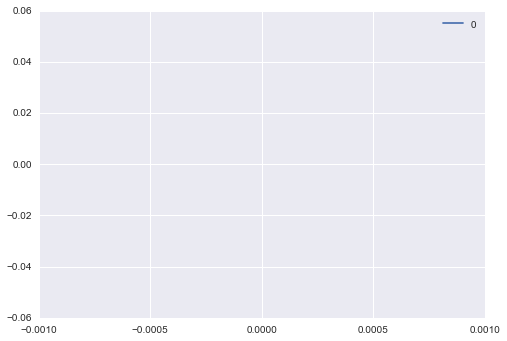

In [270]:
print(risks2)
risks2.plot()

In [240]:
list(range(5))[:2]
list(range(5))[2:]

[2, 3, 4]